# Is it really linked that? Are big dogs smarter than small dogs?

We will review the relation between the dog size and intelligence. Dog intelligence is measured by obey and reps. Obey refers to command count, how many command after dog executes the command. And reps stands for how many reps are needed by dog to learn/understand a new command. 

For this analyse we will use two different dataset

1. Breed info for size info of the dog breeds (limits for height and weight)
2. Intelligence info of dog breeds which include obey and reps limits of the dog breeds.

Both of the data set can be downloaded from link below.

https://data.world/len/dog-size-intelligence-linked
    
First review the data.
    

## Analyse Datasets

While analysing data we will use the pandas, numpy libraries for data processing and searborn libraries for the visualisation the data. You can find the details of how to use those libraries in the next sections.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Get info of related breeds
breed_info_df = pd.read_csv("breed_info.csv")
breed_info_df.tail()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
145,Papillon,8,11,5,10
146,Pomeranian,12,12,3,7
147,Poodle Toy,10,10,10,10
148,Toy Fox Terrier,10,10,4,7
149,Yorkshire Terrier,8,8,3,7


So, in the breeds data we have breeds and size limits of of the related dog breeds, I think no need to further explanation for the data, it seems obvious. Let's look at the data types of the columns:

In [2]:
breed_info_df.dtypes

Breed                 object
height_low_inches     object
height_high_inches    object
weight_low_lbs        object
weight_high_lbs       object
dtype: object

All of the types are object. For the mathematical processes we would need to convert size related columns to __numeric__ types.

In [3]:
# Get intelligence info of related breeds
dog_intelligence_df = pd.read_csv("dog_intelligence.csv")
dog_intelligence_df.tail()

,Breed,Classification,obey,reps_lower,reps_upper
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
135,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100


In the intelligence data we have the obey ratio and the min/max reps for the related dogs which we already mentioned in the introduction of this article.

In [4]:
dog_intelligence_df.dtypes

Breed             object
Classification    object
obey              object
reps_lower         int64
reps_upper         int64
dtype: object

Reps related fields seems OK for the mathematical processing but we need some transformation on the obey field to convert it to a numeric type.

We will need to join thoese two different dataset to make it meainingful and it's obvious that we can join those datasets based on the __Breed__ field.

Before joining the datasets we need some analyse as well. Let's continue to review datasets and data.

In [5]:
# Check row count values of breed info
num_rows = breed_info_df.shape[0] 
num_cols = breed_info_df.shape[1] 

print ("Row Count of breed info data: " + str(num_rows) + " Col. Count: " + str(num_cols))

Row Count of breed info data: 150 Col. Count: 5


In [6]:
# Check row count values of intelligence info
num_rows = dog_intelligence_df.shape[0] 
num_cols = dog_intelligence_df.shape[1] 

print ("Row Count of intelligence data: " + str(num_rows) + " Col. Count: " + str(num_cols))

Row Count of intelligence data: 136 Col. Count: 5


It seems we don't have intelligence (136 rows) info for all breeds (150 rows) according to row counts. Probabaly this will cause some missing values after we join the datasets.

Let's analyse the content of the datasets as well.

## Analyse Data contents
### Dealing with missing values and other transformations

In [7]:
# Check missing values of breed info
set(breed_info_df.columns[np.sum(breed_info_df.isnull()) != 0])

set()

No missing value for breed info dataset. Let's check the intelligence info as well:

In [8]:
# Check missing values of intelligence info
set(dog_intelligence_df.columns[np.sum(dog_intelligence_df.isnull()) != 0])

{'obey'}

Just in one column (obey) we have missing values. Let's review:

In [9]:
# check null values of the intelligence dataset
dog_intelligence_df.query('obey.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper
125,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
126,Basset Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
127,Mastiff,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
128,Beagle,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
129,Pekingese,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
130,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100


We have some missing values for obey field. And also we will need to analyse the merged dataset after join to check is there any additional missing values or will obey field be the just column to deal with missing data:

In [10]:
# Merge two dataframe into one dataframe based on the Breed column
df = dog_intelligence_df.merge(breed_info_df, on = 'Breed', how = 'left')
df.shape

(136, 9)

In [11]:
df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95%,1,4,19,21,40,40
1,Poodle,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
2,German Shepherd,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
3,Golden Retriever,Brightest Dogs,95%,1,4,21,24,55,75
4,Doberman Pinscher,Brightest Dogs,95%,1,4,26,28,60,100


Even if we don't have any missing data on the datasets when we merge those we can see that we have some missing values. We already sensed that while comparing row counts of the datasets (150 & 136). Lets check missing data and take action for the missing values.

In [12]:
# Get column names which have missing values
set(df.columns[np.sum(df.isnull()) != 0])

{'height_high_inches',
 'height_low_inches',
 'obey',
 'weight_high_lbs',
 'weight_low_lbs'}

In [13]:
# Get rows which contain missing values
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()').shape

(31, 9)

31 rows evaluated as missing values but we can do some additional check. Some datasets can contain values which can be evaluated as missing values like 'na'. So we may need to check those values as well:

In [14]:
# if there is a string value as na, evaluate those as missing values.
df.replace('na', np.nan, inplace=True)
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()').shape
#df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()')

(32, 9)

As we can see we have one row which contains __na__ as value which does not make sense for the size info. And now it's a missing value as well for us.

In [15]:
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
1,Poodle,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
2,German Shepherd,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
5,Shetland Sheepdog,Brightest Dogs,95%,1,4,NaN,NaN,NaN,NaN
10,Pembroke Welsh Corgi,Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN
11,Miniature Schnauzer,Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN
13,Belgian Shepherd Dog (Tervuren),Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN
16,Collie,Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN
19,Flat-Coated Retriever,Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN
20,English Cocker Spaniel,Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN
23,Cocker Spaniel,Excellent Working Dogs,85%,5,15,NaN,NaN,NaN,NaN


Those rows does not contain any size info for the related breeds. So we can drop those because we don't have any size info, none of them (height and weight). In my opinion imputing those values don't make sense because for imputing we just have intelligence info and we already trying to get relation between breed size and intelligence and imputing missing values from those values would be misleading. So we can ingore those rows by dropping them:

In [16]:
# if we have no any size info we can ignore the data. 
df = df.drop(df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()').index)
df.query('height_high_inches.isnull() & height_low_inches.isnull() & weight_high_lbs.isnull() & weight_low_lbs.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs


And another field which we have missing values in it was obey column, but for this column we have some other info like reps upper and reps lower. So we may impute the values maybe after some review and analyse.

In [17]:
df.query('obey.isnull()')

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
125,Shih Tzu,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,8,11,9,16
126,Basset Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,14,14,40,50
127,Mastiff,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,27,30,175,190
128,Beagle,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,13,16,18,30
130,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,24,26,80,120
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,26,28,70,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,19,22,45,55
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,17,17,20,22
135,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,25,27,50,60


Firstly, we need to convert the column types to numeric one for aggretaion and mathematical processes to be able make further analyse. Let's re-check the column data types:

In [18]:
df.dtypes

Breed                 object
Classification        object
obey                  object
reps_lower             int64
reps_upper             int64
height_low_inches     object
height_high_inches    object
weight_low_lbs        object
weight_high_lbs       object
dtype: object

Please remember that __obey__ field is refers to ratio and this data include __%__ charachter in it. So before convert this column to a numeric field, firstly we need to remove __%__ characthers from the data.

In [19]:

# remove % from the obey field and change the data type to numeric.
df['obey'] = pd.to_numeric(df['obey'].astype(str).map(lambda x: x.lstrip('%').rstrip('%')), errors='coerce', downcast='signed')

# convert other required fields to related numeric field.
df['height_low_inches'] = df['height_low_inches'].astype(float)
df['height_high_inches'] = df['height_high_inches'].astype(float)
df['weight_low_lbs'] = df['weight_low_lbs'].astype(int)
df['weight_high_lbs'] = df['weight_high_lbs'].astype(int)

df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95.0,1,4,19.0,21.0,40,40
3,Golden Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,75
4,Doberman Pinscher,Brightest Dogs,95.0,1,4,26.0,28.0,60,100
6,Labrador Retriever,Brightest Dogs,95.0,1,4,21.0,24.0,55,80
7,Papillon,Brightest Dogs,95.0,1,4,8.0,11.0,5,10


After convertion, we can perform aggretaion operation and we can do other mathematical processes on the data. Let's group the data and check the situation:

In [20]:
# We will check the missing values based on the reps
df[['reps_lower', 'reps_upper', 'obey']].groupby(['reps_lower', 'reps_upper']).agg(['mean'])


,,obey
,,mean
reps_lower,reps_upper,
1,4,95.0
5,15,85.0
16,25,70.0
26,40,50.0
41,80,30.0
81,100,NaN


In [21]:
# Totally missing value count
df.query('obey.isnull()').shape

(9, 9)

We have multiple missing rows but when we group the data based on the reps we have just one group is missing and also it seems there is reciprocal proportion relation between reps and obey field. So we may find a formula to impute the missing values.



In [22]:
# unify reps fields
df['avg_reps'] = (df['reps_lower'] + df['reps_upper']) / 2

# Get avg_reps mean for not na rows
avg_reps_mean = df.groupby('avg_reps').mean().reset_index()[['avg_reps', 'obey']].dropna()[['avg_reps']].mean()[0]

# Get obey mean for not na rows
avg_obey_mean = df.groupby('obey').mean().reset_index()[['obey']].dropna().mean()[0]


def nan_with_cond(row):
    """
    This function will be used to impute obey field if NaN. 
    If obey field is not NaN for the row then it's own value will be returned as the value. Bu if obey field is Nan
    then reciprocal proportion will be taken based on the row's avg_reps value and returned.
    """
    if ~np.isnan(row['obey']) : return row['obey']
    else: 
        return avg_reps_mean * avg_obey_mean / row['avg_reps']

# Overwrite the obey field by imputing missing values
df['obey'] = df.apply(nan_with_cond , axis=1)

# Type conversion from float to integer
df['obey'] = df['obey'].astype(int)

df.tail()


,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,avg_reps
130,Bloodhound,Lowest Degree of Working/Obedience Intelligence,18,81,100,24.0,26.0,80,120,90.5
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,18,81,100,26.0,28.0,70,100,90.5
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,18,81,100,19.0,22.0,45,55,90.5
134,Basenji,Lowest Degree of Working/Obedience Intelligence,18,81,100,17.0,17.0,20,22,90.5
135,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,18,81,100,25.0,27.0,50,60,90.5


Missing values are set as 18 for our data. There was a reciprocal proportion between reps and obey. Please note that for min reps pair(1 - 4 or for average it is 2.5) obey is 95.0 and for max reps pair (82 - 100 or for average it is 90.5) we impute that as 18 as expected value is decreased. And also for second max reps pair (41 - 80) obey was 30.0 and we expted that imputed value must be less than this according to reciprocal proportion for first max reps pair. 18 is compatible with this as well. So we can say that our imputation formula works as expected.

## Data Visualization

It's a common and good practice visualize data for interpreting and also understanding well. We use searborn library for visualizing. With heatmap method we can see the correlated relation between the fields. Before the review correlation it also can be used hist() method of Pandas Dataframe.

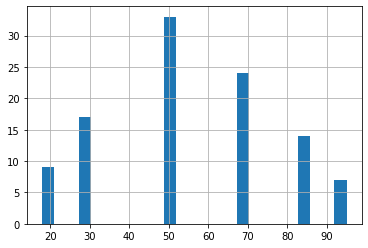

In [23]:
df['obey'].hist(bins=25);

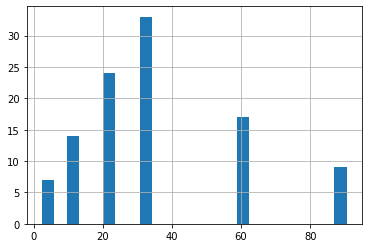

In [24]:
df['avg_reps'].hist(bins=25);

And let's check the heatmap() method from searborn library. And with this way we can understand better and if still there is a need for any transformation we can apply them. Let's check:

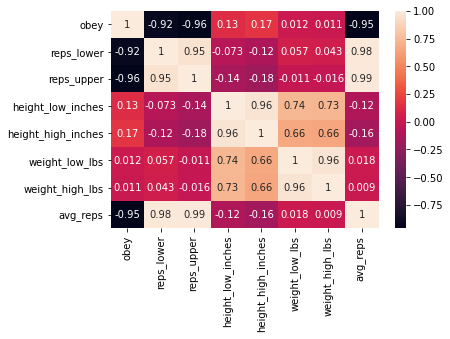

In [25]:
sns.heatmap(df.corr(), annot=True);

From this correlation we can understand that:
1. It seems Reps info (lower - upper), hight (low - high) and also weight (low - high) almost same. We may merge those data info one column to simplify data by taking average of these pairs.
    * Please note that we have already have average of reps info as avg_reps. It would be enough to simplify the other fields.

In [26]:
# find averages for the related data pairs
# This unify operation for reps pair is already done while imputing the NaN obey values
#df['avg_reps'] = (df['reps_lower'] + df['reps_upper']) / 2 
df['avg_height'] = (df['height_low_inches'] + df['height_high_inches']) / 2 
df['avg_weight'] = (df['weight_low_lbs'] + df['weight_high_lbs']) / 2 
df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,avg_reps,avg_height,avg_weight
0,Border Collie,Brightest Dogs,95,1,4,19.0,21.0,40,40,2.5,20.0,40.0
3,Golden Retriever,Brightest Dogs,95,1,4,21.0,24.0,55,75,2.5,22.5,65.0
4,Doberman Pinscher,Brightest Dogs,95,1,4,26.0,28.0,60,100,2.5,27.0,80.0
6,Labrador Retriever,Brightest Dogs,95,1,4,21.0,24.0,55,80,2.5,22.5,67.5
7,Papillon,Brightest Dogs,95,1,4,8.0,11.0,5,10,2.5,9.5,7.5


In [27]:
# Drop redundant fields to simplify data we created averages fields for next analyses
df = df.drop(['reps_lower', 'reps_upper', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs'], axis=1)
df.head()

,Breed,Classification,obey,avg_reps,avg_height,avg_weight
0,Border Collie,Brightest Dogs,95,2.5,20.0,40.0
3,Golden Retriever,Brightest Dogs,95,2.5,22.5,65.0
4,Doberman Pinscher,Brightest Dogs,95,2.5,27.0,80.0
6,Labrador Retriever,Brightest Dogs,95,2.5,22.5,67.5
7,Papillon,Brightest Dogs,95,2.5,9.5,7.5


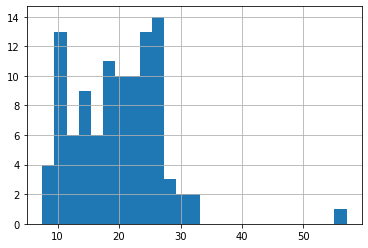

In [28]:
df['avg_height'].hist(bins=25);

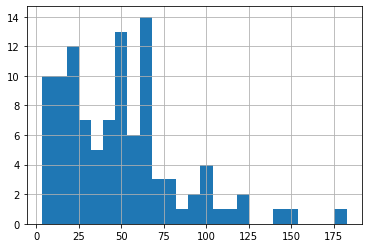

In [29]:
df['avg_weight'].hist(bins=25);

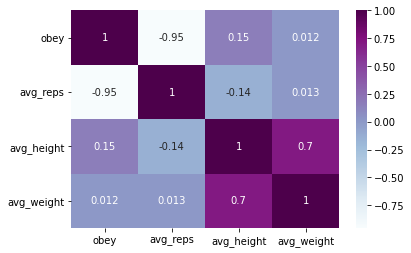

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='BuPu');

## Conclusion

Let's interpret the visual

Firstly, according to our analysis we can verify that height and weight are directly correlated each other as expected but this is not a finding just a fact.

1. *Obey* and *avg_reps* __almost__ same as metric value but they are opposite of each other, while some of them is positive other one is negative. So we can say that dogs which learn a command with less reps are more loyal and more oriented to owners.
2. It seems there is no directly relation between dog size and intelligence according to correlation.
 